## library

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from skimage.transform import resize


### Reading all the file names in all 4 folders

In [6]:
dora=glob.glob('dora/*.jpg')
ben10=glob.glob('ben10/*.jpg')
doraemon=glob.glob('doraemon/*.jpg')
pink=glob.glob('pinkpanther/*.jpg')

### Reading the image data from all files and storing it in a variable, Store the label as well


In [8]:
image=[]
label=[]
for i in dora:
    img=plt.imread(i)
    image.append(img)
    label.append(1)

for i in ben10:
    img=plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in doraemon:
    img=plt.imread(i)
    image.append(img)
    label.append(3)
    
for i in pink:
    img=plt.imread(i)
    image.append(img)
    label.append(4)
    

In [9]:
dic={1:'dora',2:'ben10',3:'doraemon',4:'pink'}

### Ploting some of the images


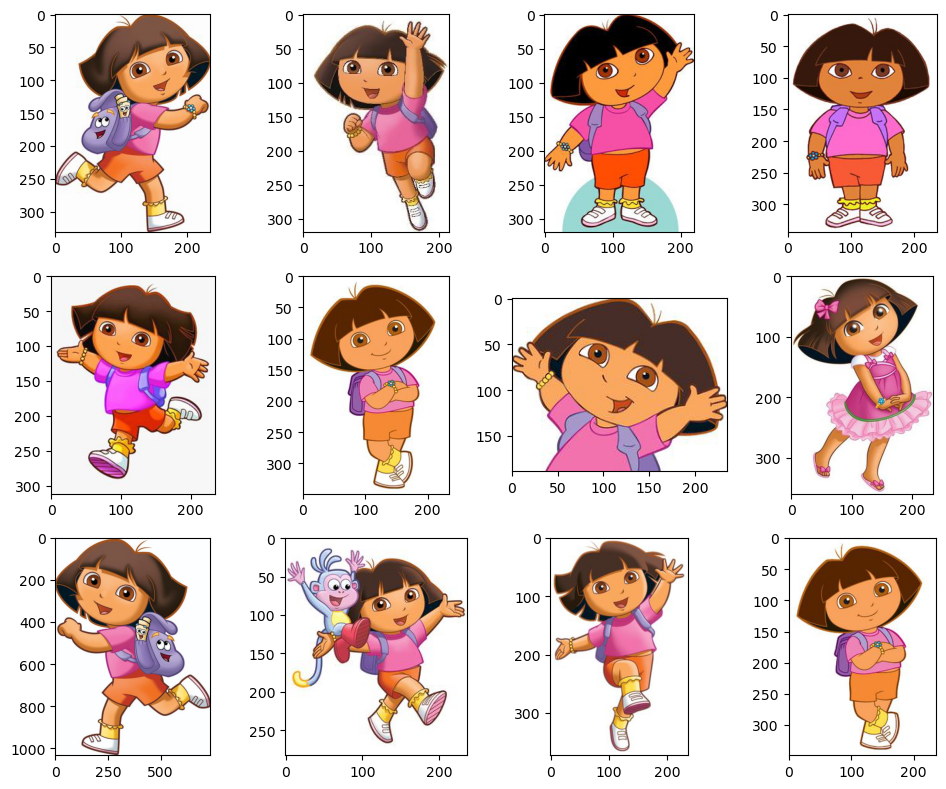

In [11]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

### Shuffling images and labels 

In [13]:
image,label=shuffle(image,label)

### Ploting the images once again


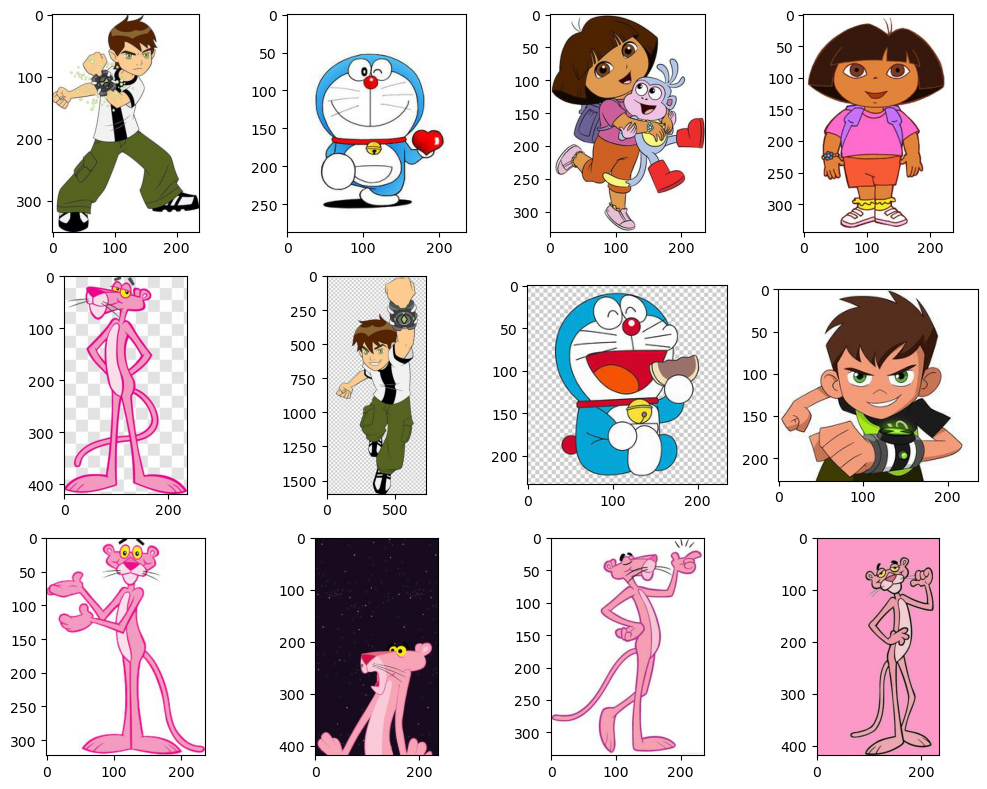

In [14]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

### Checking the shape of some of the images


In [15]:
for i in range(5):
    print(image[i].shape)

(351, 236, 3)
(287, 236, 3)
(331, 236, 3)
(344, 236, 3)
(418, 236, 3)


### Resizing all the images to a same height and width




In [19]:
x=[]
for i in image:
    x.append(resize(i,(300,300,3)))
    

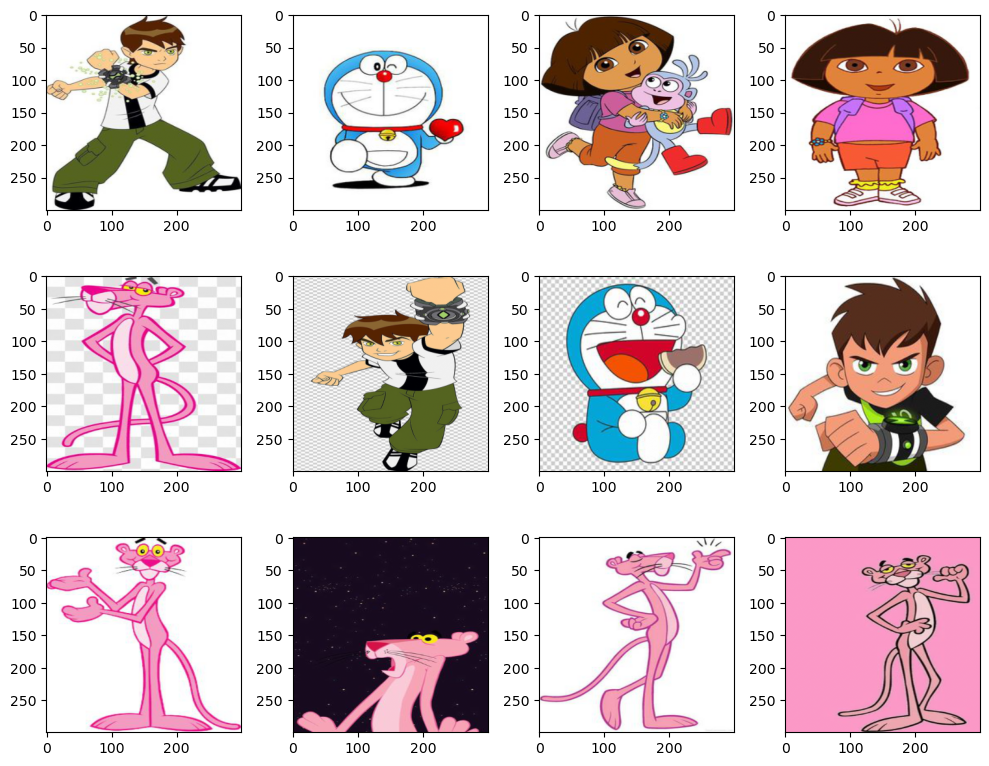

In [20]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x[i])
plt.tight_layout()

### Converting images and labels to numpy array and storing them as X and y variables

In [21]:
X=np.array(x)
y=np.array(label)

### Reshaping the images to 1 dimension


In [24]:
a,b,c,d=X.shape

X=X.reshape((a,b*c*d))

### Train test Split


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## creating svm model and  training it

In [27]:
from sklearn.svm import SVC

In [28]:
model=SVC()

In [29]:
model.fit(X_train,y_train)

SVC()

### Making predictions with X_test

In [31]:
%time y_pred=model.predict(X_test)

CPU times: total: 3.98 s
Wall time: 2.01 s


### ploting images after prediction

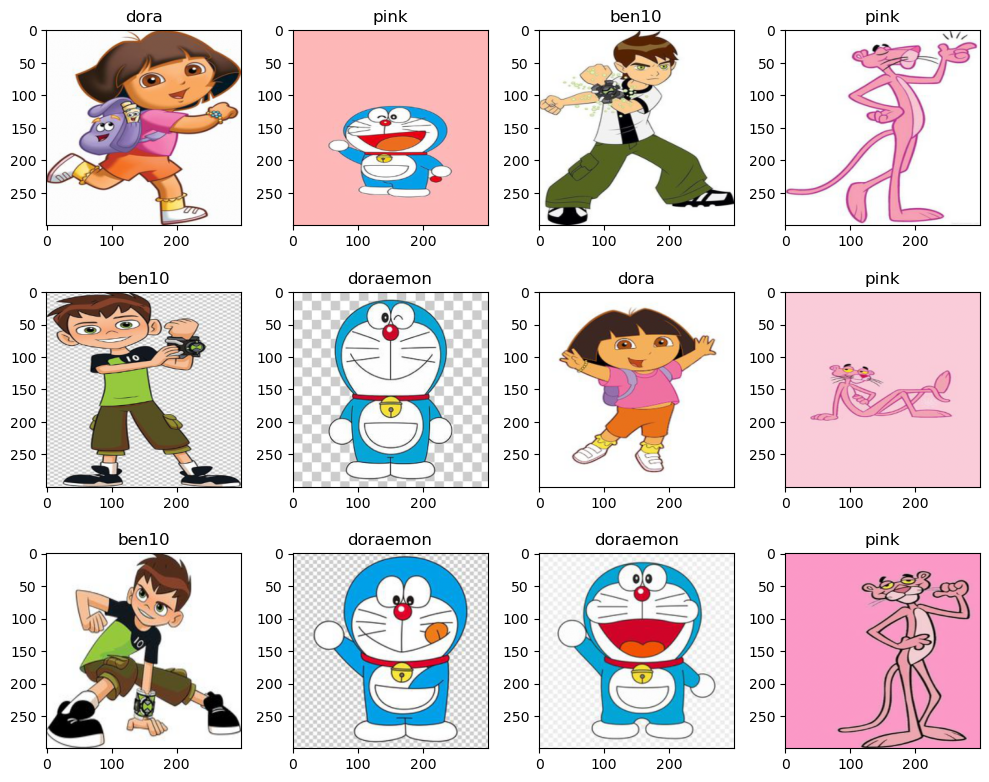

In [35]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i].reshape(300,300,3))
    plt.title(dic[y_pred[i]])
plt.tight_layout()

### Evaluating the model

In [32]:
from sklearn import metrics

In [33]:
metrics.accuracy_score(y_test,y_pred)

0.9523809523809523

<Axes: >

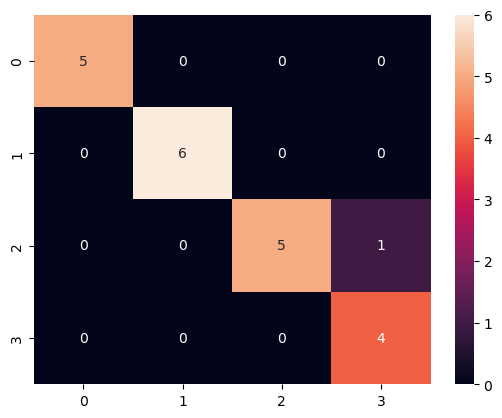

In [38]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [40]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      0.83      0.91         6
           4       0.80      1.00      0.89         4

    accuracy                           0.95        21
   macro avg       0.95      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

